# Analysis of Loan Prosper Data
## by SANJAY

## Preliminary Wrangling :

> Dataset Information :
* The dataset chosen is Loan Data from Prosper.
* This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
* It was last updated on 03/11/2014.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')

## Dataset Overview :

Before running straight into the exploration, let's just take a moment to get a high-level overview of the dataset. We can refer back to these points if we need to get our bearings on what we should expect to see from each variable.

In [3]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
df.head(10)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


### What is the structure of your dataset?

> Dataset consists of 113937 rows(observations) and  81 columns(variables).

#### Note :
* The dataset being really huge, pandas collapses the columns disabling us to view all the variables and observations. Hence to choose the main features of interest we make use of a spreadsheet software.

### What is/are the main feature(s) of interest in your dataset?

> LoanStatus is the main feature of interest in the dataset as I want to analyse the various factors influencing it and understand the trends/patterns to determine the loan outcome status and the LoanOriginalAmount given.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> This is a tricky question as I firmly and only believe in data substantiated intuition but since there are more than 80 variables, it's very difficult to anlayse each on of it. So I **think** the main feautures of interest that will support my investigation are :
* Employment Related (EmploymentStatus)
* Income Related (IncomeRange)
* Credibility (IsBorrowerHomeowner, Recommendations)
* Classifications(ProsperRating (Alpha))

In [4]:
#Creating a new dataframe with specific chosen columns
df1 = df[['LoanStatus', 'LoanOriginalAmount','BorrowerAPR', 'BorrowerRate','ProsperRating (Alpha)',
          'EmploymentStatus', 'IncomeRange', 'IsBorrowerHomeowner', 'Recommendations']]
df1.head(2)

,LoanStatus,LoanOriginalAmount,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),EmploymentStatus,IncomeRange,IsBorrowerHomeowner,Recommendations
0,Completed,9425,0.16516,0.158,NaN,Self-employed,"$25,000-49,999",True,0
1,Current,10000,0.12016,0.092,A,Employed,"$50,000-74,999",False,0


In [5]:
df1.describe()#Descriptive summary for numerical variables

,LoanOriginalAmount,BorrowerAPR,BorrowerRate,Recommendations
count,113937.00000,113912.000000,113937.000000,113937.000000
mean,8337.01385,0.218828,0.192764,0.048027
std,6245.80058,0.080364,0.074818,0.332353
min,1000.00000,0.006530,0.000000,0.000000
25%,4000.00000,0.156290,0.134000,0.000000
50%,6500.00000,0.209760,0.184000,0.000000
75%,12000.00000,0.283810,0.250000,0.000000
max,35000.00000,0.512290,0.497500,39.000000


## Univariate Exploration :

1) Distribution of the status of all the loans in the bank is to be plotted.

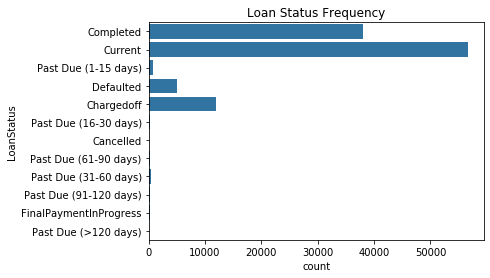

In [6]:
base_color = sb.color_palette()[0]
sb.countplot(data = df1, y = 'LoanStatus', color = base_color);
plt.title('Loan Status Frequency');

* Our focus is on 'Current','Completed','Defaulted','Chagedoff','PastDue'. Therefore we simplify the dataset by making 3 approximations :
1) Conmbining all post dues 2)Focusing on the major categories.

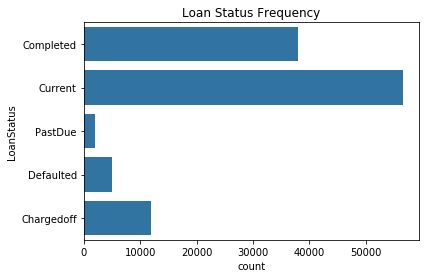

In [7]:
df1.LoanStatus.replace(to_replace = ['Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)',
                                     'Past Due (91-120 days)','Past Due (>120 days)'],value = 'PastDue',inplace = True)
df1 = df1[df1.LoanStatus.isin(['Current','Completed','Defaulted','Chargedoff','PastDue'])]
sb.countplot(data = df1, y = 'LoanStatus', color = base_color);
plt.title('Loan Status Frequency');

* Most loans are currently ongoing,followed by loans completed and charged off.

2) What is the distribution of the loan amount offered by the bank in general ?

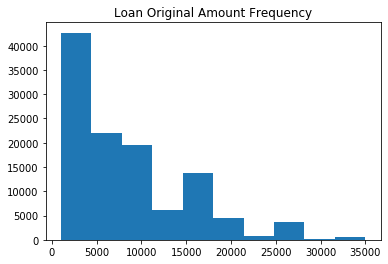

In [8]:
plt.hist(data = df1,x = 'LoanOriginalAmount');
plt.title('Loan Original Amount Frequency');

* The orginal loan amount is skewed to the right, bimodal and has most of it's amount till 12000.
* To have a closer look at the histogram we limit the xscale and rest the bins.

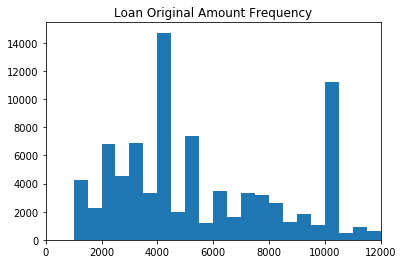

In [9]:
bin_edges = np.arange(0,df1.LoanOriginalAmount.max()+1,500)
plt.hist(data = df1,x = 'LoanOriginalAmount',bins = bin_edges);
plt.xlim(0,12000);
plt.title('Loan Original Amount Frequency');

3) I would like to investigate populate from which employment sector has prospered a loan?

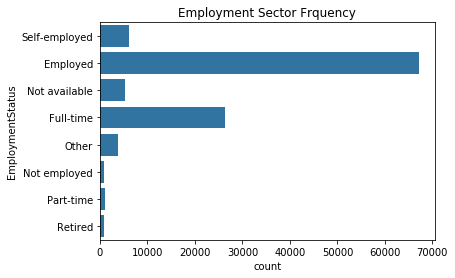

In [10]:
g = sb.countplot(data = df1, y = 'EmploymentStatus', color = base_color);
plt.title('Employment Sector Frquency');

* As expected, people who are employed are the ones who prosper a loan the most.

4) I wuld like to classify the borrower based on prosper rating.

In [11]:
prosper_rating_order = ['HR','E','D','C','B','A','AA']
ordererd_prosper_rating = pd.api.types.CategoricalDtype(ordered = True,categories = prosper_rating_order)
df1['ProsperRating (Alpha)'] = df1['ProsperRating (Alpha)'].astype(ordererd_prosper_rating)

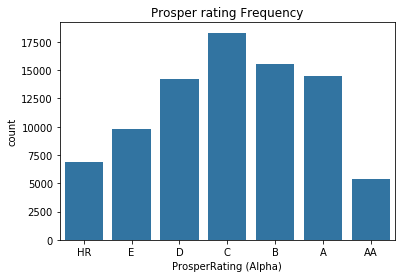

In [12]:
sb.countplot(data = df1, x = 'ProsperRating (Alpha)',color = base_color);
plt.title('Prosper rating Frequency');

### Discuss the distribution(s) of your variable(s) of interest. 
> UNIVARIATE DISTRIBUTION OBSERVATION :
* Most loans are currently ongoing,followed by loans completed and charged off.This fact adds base to our research question on understanding whether the Current loans will be Completed or Defaulted on various aspects so that we have stringent criteria's on providing loan amounts.
* Almost 75% of the Loan amount provided by the bank is lunder 12000.
* As expected, people who are employed are the ones who prosper a loan the most.
* The 'ProsperRating (Alpha)' could be used to differentiatie in future investigations.

### Were there any unusual points? Did you need to perform any transformations?

> * The distribution of 'LoanOriginalAmount' was highly skewed to the right and ahd 75% of te data udnder the a certain limit. Hence I transformed the x axis limt and adjusted the bin values to analyse the distribution of the foucused area excluding the outliers. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> * The LoanStatus feature was untidy as it included various classifications of Past Due based on months that made visualisations awkward. So I combined all past dues together and focused on the major categories being 'Current', 'Completed', 'Defaulted', 'Chagedoff', 'PastDue'. By doing this we can get easily comparable visualisation without changing the scale of comparision.

## Bivariate Exploration :

1) Investigate the Loan Amount based by classifying it based on ProsperRating (Alpha).

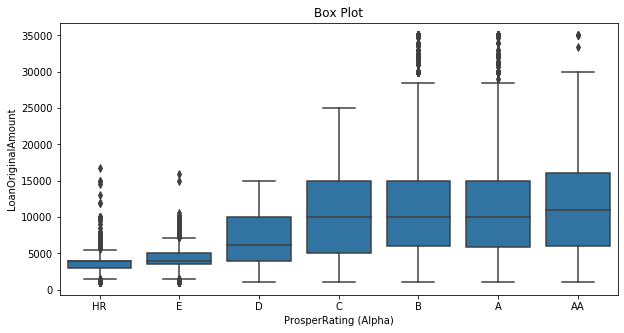

In [13]:
plt.figure(figsize = [10,5])
plt.title('Box Plot');
g = sb.boxplot(data = df1, x ='ProsperRating (Alpha)', y = 'LoanOriginalAmount', color  = base_color)

* Median Loan Amount of the completed, defaulted and chargedoff is lesser than current and pastdue.
* This means that lower Loan Amount has a higher tendency of getting terminated.

2) Relation between Borrower Rater and Annual Percentage Rate with Loan Amount.

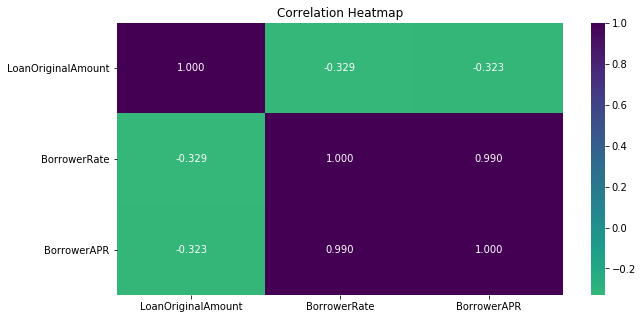

In [14]:
plt.figure(figsize = [10, 5])
sb.heatmap(df1[['LoanOriginalAmount', 'BorrowerRate','BorrowerAPR']].corr(), annot = True, fmt = '.3f',cmap = 'viridis_r', center = 0);
plt.title('Correlation Heatmap');

* Loan Amount is negatively correlated with the 'BorrowerRate' and 'BorrowerAPR'.
* While they both have stronger positive correlation 

3) Comparision of income range with the Loan Status

In [15]:
#Wrangling the Income Range Data
df1.IncomeRange.replace('Not displayed',np.NaN,inplace = True)
df1.IncomeRange.replace('Not employed','$0',inplace = True)
df1.IncomeRange = df1.IncomeRange.dropna()
#Ordering the Income Range Data
income_range_order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
ordered_income_range = pd.api.types.CategoricalDtype(ordered = True, categories = income_range_order)
df1.IncomeRange = df1.IncomeRange.astype(ordered_income_range)

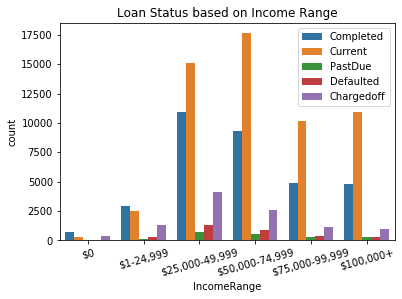

In [16]:
ax = sb.countplot(data = df1, x = 'IncomeRange', hue = 'LoanStatus')
ax.legend(loc = 1) 
plt.xticks(rotation = 15);
plt.title('Loan Status based on Income Range');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>BIVARIATE DISTRIBUTION OBSERVATION : 
* The loan amounts tends to be higher wih lower Borrower rate and Borrower annual percentage rate.  
* The median loan amount increases steadily with a increase in proserity rating.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I used to believe that banks are mostly used to help the poor(famer loans etc.,) and the rich (Buisness loans) but from plot 3, it was suprising to know that people with the middle income range are the ones who prosper the loan frequently. 

## Multivariate Exploration :

1) Extending the relation between between prosper rating and loan amount based on whether a person owns a home.

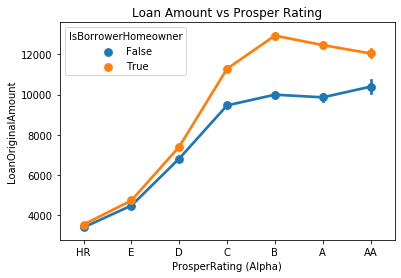

In [17]:
sb.pointplot(data = df1, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner');
plt.title('Loan Amount vs Prosper Rating');

* I still remember being denied a high education loan amount due to lack of home(asset) and this plot substantiates my situation.
* Despite both the loan amounts line increasing with Prosperity Rating, a person who owns house is always provided with a larger sum.

2) Classifying the relation between Loan Amount and Borrower Rate based on LoanStatus 

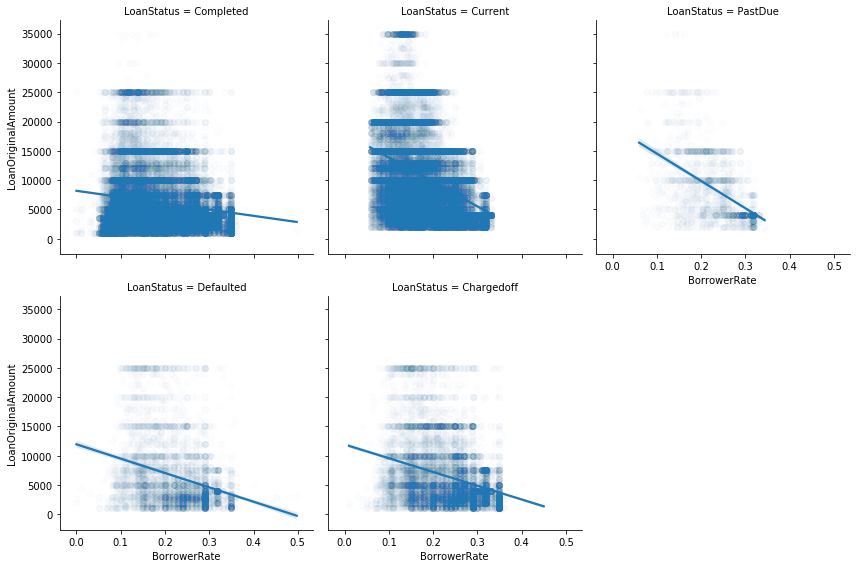

In [18]:
g = sb.FacetGrid(data = df1, col = 'LoanStatus', size = 4, col_wrap = 3);
g.map(sb.regplot, 'BorrowerRate', 'LoanOriginalAmount',y_jitter = 0.04, fit_reg = True,scatter_kws = {'alpha' : 0.01});

* The regression line with negative slope in all the LoanStatus shows extends the inverse relationship between

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> MULTIIVARIATE DISTRIBUTION OBSERVATION :
* The above multivariate visualisations used a third variable to extended the previous bivariate results. 
* Plot 1 strenghtned the positive relationship between prosperity rating and loan amount while also proving the house owners always recieve a higher sum irrespective of the prosperity rating.
* Plot 2 extended the inverse relationship between the Loan Amount and Borrower Rate and also the density of plotting also infer that 'Current' is the highest LoanStatus.

##  Resources :

* https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0
* https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
* https://stackoverflow.com/questions/27965295/dropping-rows-from-dataframe-based-on-a-not-in-condition
* https://stackoverflow.com/questions/23307301/replacing-column-values-in-a-pandas-dataframe